# Homework 2, *part 1* (40 points)

This warm-up problem set is provided to help you get used to PyTorch.

Please, only fill parts marked with "`Your code here`".

In [0]:
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

import torch
assert torch.__version__ >= '1.0.0'

import torch.nn.functional as F
import time

To learn best practices $-$ for example,

* how to choose between `.sqrt()` and `.sqrt_()`,
* when to use `.view()` and how is it different from `.reshape()`,
* which `dtype` to use,

$-$ you are expected to google a lot, read tutorials on the Web and study documentation.

Quick documentation on functions and modules is available with `?` and `help()`, like so:

In [0]:
help(torch.sqrt)

Help on built-in function sqrt:

sqrt(...)
    sqrt(input, out=None) -> Tensor
    
    Returns a new tensor with the square-root of the elements of :attr:`input`.
    
    .. math::
        \text{out}_{i} = \sqrt{\text{input}_{i}}
    
    Args:
        input (Tensor): the input tensor
        out (Tensor, optional): the output tensor
    
    Example::
    
        >>> a = torch.randn(4)
        >>> a
        tensor([-2.0755,  1.0226,  0.0831,  0.4806])
        >>> torch.sqrt(a)
        tensor([    nan,  1.0112,  0.2883,  0.6933])



In [0]:
# to close the Jupyter help bar, press `Esc` or `q`
?torch.cat

## Task 1 (3 points)

Use tensors only: **no lists, loops, numpy arrays etc.**

*Clarification update:*

1. *you mustn't emulate PyTorch tensors with lists or tuples. Using a list for scaffolding utilities not provided by PyTorch core (e.g. to store model's layers or to group function arguments) is OK;*
2. *no loops*;
3. *you mustn't use numpy or other tensor libraries except PyTorch.*

$\rho(\theta)$ is defined in polar coordinate system:

$$\rho(\theta) = (1 + 0.9 \cdot \cos{8\theta} ) \cdot (1 + 0.1 \cdot \cos{24\theta}) \cdot (0.9 + 0.05 \cdot \cos {200\theta}) \cdot (1 + \sin{\theta})$$

1. Create a regular grid of 1000 values of $\theta$ between $-\pi$ and $\pi$.
2. Compute $\rho(\theta)$ at these values.
3. Convert it into Cartesian coordinates ([howto](http://www.mathsisfun.com/polar-cartesian-coordinates.html)).

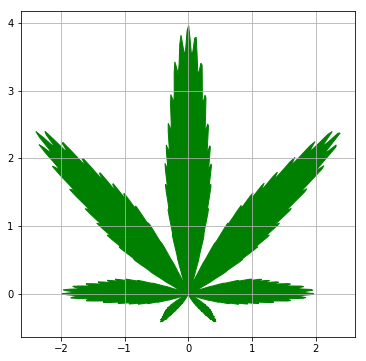

In [0]:
# (1) Your code here
theta = torch.linspace(- np.pi, np.pi, steps=1000)
assert theta.shape == (1000,)

# (2) Your code here
rho = (1 + 0.9 * torch.cos(8*theta)) * (1 + 0.1 * torch.cos(24 theta)) * (0.9 + 0.05 * torch.cos(200*theta)) * (1 + torch.sin(theta))
 
assert torch.is_same_size(rho, theta)

# (3) Your code here
## having (r, theta):
## x = r*cos(theta)
## y = r*sin(theta)

x = rho*torch.cos(theta)
y = rho*torch.sin(theta)

plt.figure(figsize=[6,6])
plt.fill(x.data.numpy(), y.data.numpy(), color='green')
plt.grid()

## Task 2 (7 points)

Use tensors only: **no lists, loops, numpy arrays etc.**

*Clarification update: see task 1.*

We will implement [Conway's Game of Life](https://en.wikipedia.org/wiki/Conway's_Game_of_Life) in PyTorch.

![img](https://cdn.tutsplus.com/gamedev/authors/legacy/Stephane%20Beniak/2012/09/11/Preview_Image.png)

If you skipped the URL above, here are the rules:
* You have a 2D grid of cells, where each cell is "alive"(1) or "dead"(0)
* At one step in time, the generation update happens:
  * Any living cell that has 2 or 3 neighbors survives, otherwise (0,1 or 4+ neighbors) it dies
  * Any cell with exactly 3 neighbors becomes alive if it was dead

You are given a reference numpy implementation of the update step. Your task is to convert it to PyTorch.

In [0]:
from scipy.signal import correlate2d as conv2d

def numpy_update(alive_map):
    # Count neighbours with convolution
    conv_kernel = np.array([[1,1,1],
                            [1,0,1],
                            [1,1,1]])
    
    num_alive_neighbors = conv2d(alive_map, conv_kernel, mode='same')
    
    # Apply game rules
    born = np.logical_and(num_alive_neighbors == 3, alive_map == 0)
    survived = np.logical_and(np.isin(num_alive_neighbors, [2,3]), alive_map == 1)
    
    np.copyto(alive_map, np.logical_or(born, survived))

In [0]:
from torch.autograd import Variable

def torch_update(alive_map):
    """
    Game of Life update function that does to `alive_map` exactly the same as `numpy_update`.
    
    :param alive_map: `torch.tensor` of shape `(height, width)` and dtype `torch.float32`
        containing 0s (dead) an 1s (alive)
    """
    # Your code here
    
    # Count neighbours with convolution
    conv_kernel = torch.Tensor([[1,1,1],
                            [1,0,1],
                            [1,1,1]]).float().unsqueeze_(0).unsqueeze_(0)
    
    num_alive_neighbors = torch.conv2d(alive_map[None, None, :], conv_kernel, padding = 1).squeeze_(0).squeeze_(0)
    
    # Apply game rules
    born = (num_alive_neighbors == 3) & (alive_map == 0)
    survived = ((num_alive_neighbors == 2) | (num_alive_neighbors == 3)) & (alive_map == 1)
    
    alive_map.copy_((born | survived))

In [0]:
# Generate a random initial map
alive_map_numpy = np.random.choice([0, 1], p=(0.5, 0.5), size=(100, 100))
alive_map_torch = torch.tensor(alive_map_numpy).float().clone()

numpy_update(alive_map_numpy)
torch_update(alive_map_torch)

# results should be identical
assert np.allclose(alive_map_torch.numpy(), alive_map_numpy), \
    "Your PyTorch implementation doesn't match numpy_update."
print("Well done!")

Well done!


In [0]:
%matplotlib notebook
plt.ion()

# initialize game field
alive_map = np.random.choice([0, 1], size=(100, 100))
alive_map = torch.tensor(alive_map).float()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    torch_update(alive_map)
    
    # re-draw image
    ax.clear()
    ax.imshow(alive_map.view(100, 100).numpy(), cmap='gray')
    fig.canvas.draw()

<IPython.core.display.Javascript object>

In [0]:
# A fun setup for your amusement
alive_map = np.arange(100) % 2 + np.zeros([100, 100])
alive_map[48:52, 50] = 1

alive_map = torch.tensor(alive_map).float()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(150):
    torch_update(alive_map)
    ax.clear()
    ax.imshow(alive_map.numpy(), cmap='gray')
    fig.canvas.draw()

<IPython.core.display.Javascript object>

More fun with Game of Life: [video](https://www.youtube.com/watch?v=C2vgICfQawE)

## Task 3 (30 points)

You have to solve yet another character recognition problem: 10 letters, ~14 000 train samples.

For this, we ask you to build a multilayer perceptron (*i.e. a neural network of linear layers*) from scratch using **low-level** PyTorch interface.

Requirements:
1. at least 82% accuracy
2. at least 2 linear layers
3. use [softmax followed by categorical cross-entropy](https://gombru.github.io/2018/05/23/cross_entropy_loss/)

**You are NOT allowed to use**
* numpy arrays
* `torch.nn`, `torch.optim`, `torch.utils.data.DataLoader`
* convolutions

##### Clarification update:

1. *you mustn't emulate PyTorch tensors with lists or tuples. Using a list for scaffolding utilities not provided by PyTorch core (e.g. to store model's layers or to group function arguments) is OK;*
2. *you mustn't use numpy or other tensor libraries except PyTorch;*
3. *the purpose of part 1 is to make you google and read the documentation a LOT so that you learn which intrinsics PyTorch provides and what are their interfaces. This is why if there is some tensor functionality that is directly native to PyTorch, you mustn't emulate it with loops. Example:*

```
x = torch.rand(1_000_000)

# Wrong: slow and unreadable
for idx in range(x.numel()):
    x[idx] = math.sqrt(x[idx])

# Correct
x.sqrt_()
```

4. *Loops are prohibited except for iterating over*

  * *parameters (and their companion tensors used by optimizer, e.g. running averages),*
  * *layers,*
  * *epochs (or "global" gradient steps if you don't use epoch logic),*
  * *batches in the dataset (using loops for collecting samples into a batch is not allowed).*

Tips:

* Pick random batches (either shuffle data before each epoch or sample each batch randomly).
* Do not initialize weights with zeros ([learn why](https://stats.stackexchange.com/questions/27112/danger-of-setting-all-initial-weights-to-zero-in-backpropagation)). Gaussian noise with small variance will do.
* 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve.
* To improve accuracy, consider changing layers' sizes, nonlinearities, optimization methods, weights initialization.
* Don't use GPU yet.

**Reproducibility requirement**: you have to format your code cells so that `Cell -> Run All` on a fresh notebook **reliably** trains your model to the desired accuracy in a couple of minutes and reports the accuracy reached.

Happy googling!

In [0]:
import os
import numpy as np
from scipy.misc import imread,imresize
from sklearn.model_selection import train_test_split
from glob import glob

def load_notmnist(path='./notMNIST_small',letters='ABCDEFGHIJ',
                  img_shape=(28,28),test_size=0.25,one_hot=False):
    
    # download data if it's missing. If you have any problems, go to the urls and load it manually.
    if not os.path.exists(path):
        print("Downloading data...")
        assert os.system('curl http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz > notMNIST_small.tar.gz') == 0
        print("Extracting ...")
        assert os.system('tar -zxvf notMNIST_small.tar.gz > untar_notmnist.log') == 0
    
    data,labels = [],[]
    print("Parsing...")
    for img_path in glob(os.path.join(path,'*/*')):
        class_i = img_path.split(os.sep)[-2]
        if class_i not in letters: continue
        try:
            data.append(imresize(imread(img_path), img_shape))
            labels.append(class_i,)
        except:
            print("found broken img: %s [it's ok if <10 images are broken]" % img_path)
        
    data = np.stack(data)[:,None].astype('float32')
    data = (data - np.mean(data)) / np.std(data)

    #convert classes to ints
    letter_to_i = {l:i for i,l in enumerate(letters)}
    labels = np.array(list(map(letter_to_i.get, labels)))
    
    if one_hot:
        labels = (np.arange(np.max(labels) + 1)[None,:] == labels[:, None]).astype('float32')
    
    #split into train/test
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=42)
    
    print("Done")
    return X_train, y_train, X_test, y_test



In [0]:
np.random.seed(666)
torch.manual_seed(666)

# from notmnist import load_notmnist
letters = 'ABCDEFGHIJ' 
X_train, y_train, X_test, y_test = map(torch.tensor, load_notmnist(letters=letters))
X_train.squeeze_()
X_test.squeeze_();

Extracting ...
Parsing...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


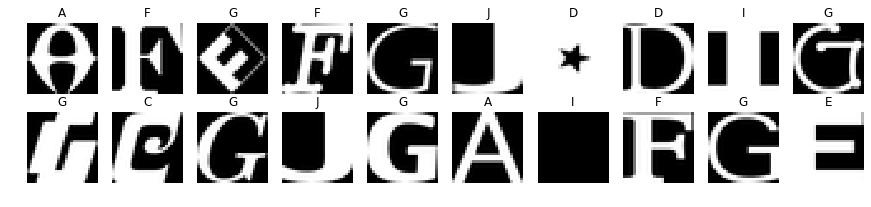

In [0]:
fig, axarr = plt.subplots(2, 10, figsize=(15,3))

for idx, ax in enumerate(axarr.ravel()):
    ax.imshow(X_train[idx].numpy(), cmap='gray')
    ax.axis('off')
    ax.set_title(letters[y_train[idx]])

The cell below has an example layout for encapsulating your neural network. Feel free to modify the interface if you need to (add arguments, add return values, add methods etc.). For example, you may want to add a method `do_gradient_step()` that executes one optimization algorithm (SGD / Adadelta / Adam / ...) step.

In [0]:
class NeuralNet:
    def __init__(self, lr, batch_size):
      
        # hyperparams
        self.batch_size = batch_size
        self.lr = lr
        
        # first layer
        self.W1 = torch.randn(28*28, 70, requires_grad=True) 
        self.b1 = torch.randn(1, 70, requires_grad=True) 
        
        # second layer
        self.W2 = torch.randn(70, 10, requires_grad=True)
        self.b2 = torch.randn(1, 10, requires_grad=True)


    def _forward(self, x):
        x = x.flatten(1)
        x = x @ self.W1 + self.b1
        x.sigmoid_()
        x = x @ self.W2 + self.b2
        x.exp_()
        x = x / x.sum(dim=1, keepdim=True)
        
        return x
    
    def _loss(self, output, target):
        log_softmax = output.log()
        one_hot_target = torch.zeros(len(target), 10).scatter_(1, target.view(-1, 1), 1)
        loss = -(log_softmax * one_hot_target).mean()
        return loss
    
    def _step(self, x, batch_target):
      
        # forward
        output = self._forward(x)
        loss = self._loss(output, batch_target)
        
        # backward
        loss.backward()
        
        # update weights
        ### first layer
        self.W1.data -= self.lr * self.W1.grad.data
        self.b1.data -= self.lr * self.b1.grad.data
        ### second layer
        self.W2.data -= self.lr * self.W2.grad.data
        self.b2.data -= self.lr * self.b2.grad.data
        
        # zero grad
        self.W1.grad.data.zero_()
        self.b1.grad.data.zero_()
        self.W2.grad.data.zero_()
        self.b2.grad.data.zero_()
           
    def train(self, X_train, y_train, n_epoch=150):
      
        start_time = time.time()
        for i in range(n_epoch):
          
            t = time.time()
            idx = torch.randperm(len(X_train))
            n_batches = (len(X_train) - 1) // self.batch_size + 1
            for j in range(n_batches):
                X_batch = X_train[idx[j*self.batch_size : (j+1)*self.batch_size]] 
                y_batch = y_train[idx[j*self.batch_size : (j+1)*self.batch_size]]
                self._step(X_batch, y_batch)
            
            time_per_epoch = time.time() - t
            train_acc = accuracy(model, X_train, y_train) * 100
            test_acc = accuracy(model, X_test, y_test) * 100
            print(f"EPOCH {i+1}: train acc: {train_acc:.2f} %")
           
            
        end_time = time.time()
        print(f'TOTAL TIME SPENT: {end_time - start_time:.1f}')
        
    def predict(self, images):
        """
        images: `torch.tensor` of shape `batch_size x height x width`
            and dtype `torch.float32`.
        
        returns: `output`, a `torch.tensor` of shape `batch_size x 10`,
            where `output[i][j]` is the probability of `i`-th
            batch sample to belong to `j`-th class.
        """
        return self._forward(images)

    # Your code here

In [0]:
def accuracy(model, images, labels):
    """
    model: `NeuralNet`
    images: `torch.tensor` of shape `N x height x width`
        and dtype `torch.float32`
    labels: `torch.tensor` of shape `N` and dtype `torch.int64`. Contains
        class index for each sample
    
    returns:
        fraction of samples from `images` correctly classified by `model`
    """
    preds = model.predict(images).argmax(dim=1)
    acc = torch.sum(preds == labels).float() / len(labels)
    return acc

In [0]:
model = NeuralNet(lr=0.055, batch_size=25)

# Your code here (train the model)
model.train(X_train, y_train, n_epoch= 180)

EPOCH 1: train acc: 16.65 %
EPOCH 2: train acc: 28.44 %
EPOCH 3: train acc: 38.75 %
EPOCH 4: train acc: 46.70 %
EPOCH 5: train acc: 52.11 %
EPOCH 6: train acc: 56.37 %
EPOCH 7: train acc: 59.43 %
EPOCH 8: train acc: 61.95 %
EPOCH 9: train acc: 64.05 %
EPOCH 10: train acc: 65.92 %
EPOCH 11: train acc: 67.52 %
EPOCH 12: train acc: 68.67 %
EPOCH 13: train acc: 69.88 %
EPOCH 14: train acc: 70.95 %
EPOCH 15: train acc: 71.73 %
EPOCH 16: train acc: 72.36 %
EPOCH 17: train acc: 73.18 %
EPOCH 18: train acc: 73.83 %
EPOCH 19: train acc: 74.51 %
EPOCH 20: train acc: 75.08 %
EPOCH 21: train acc: 75.56 %
EPOCH 22: train acc: 75.95 %
EPOCH 23: train acc: 76.36 %
EPOCH 24: train acc: 76.78 %
EPOCH 25: train acc: 77.12 %
EPOCH 26: train acc: 77.55 %
EPOCH 27: train acc: 77.82 %
EPOCH 28: train acc: 78.15 %
EPOCH 29: train acc: 78.47 %
EPOCH 30: train acc: 78.83 %
EPOCH 31: train acc: 79.05 %
EPOCH 32: train acc: 79.37 %
EPOCH 33: train acc: 79.51 %
EPOCH 34: train acc: 79.76 %
EPOCH 35: train acc: 79

In [0]:
train_acc = accuracy(model, X_train, y_train) * 100
test_acc = accuracy(model, X_test, y_test) * 100
print("Train accuracy: %.2f, test accuracy: %.2f" % (train_acc, test_acc))

assert test_acc >= 82.0, "You have to do better"

Train accuracy: 88.84, test accuracy: 83.49
